In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

f = h5py.File('/tmp/just/jerry/foo.h5', 'r')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

f = h5py.File('/tmp/just/jerry/foo.h5', 'r')

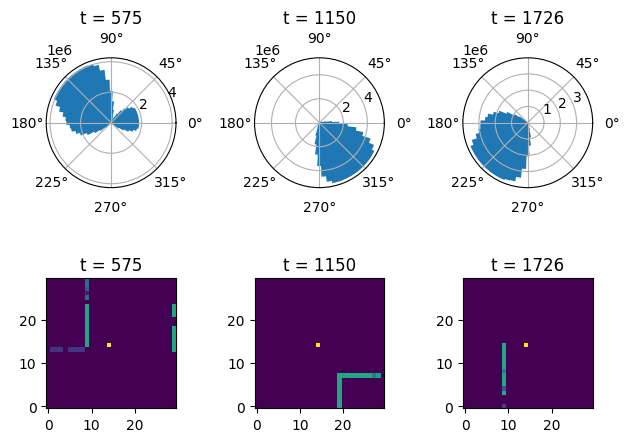

In [3]:
#print(f['vfh_agent/polar_histogram'].shape)
dset = f['vfh_agent/polar_histogram']

theta = np.linspace(0.0, 2 * np.pi, dset.shape[0], endpoint=False)
#ax1 = plt.subplot(111, projection='polar')
#ax1.bar(theta, dset[:,5])
#ax1.set_title('t = 5')

axes = []
for i in range(1,4):
    n = int(i * (dset.shape[1] - 1) / 3)
    axes.append(plt.subplot(2, 3, i, projection='polar'))
    axes[i-1].bar(theta, dset[:,n])
    axes[i-1].set_title(f't = {n}')

window_size = 30

dset2 = np.array(f['vfh_agent/window_histogram'])
#print(dset2.shape)
for i in range(1,4):
    n = int(i * (dset2.shape[1] - 1) / 3)
    axes.append(plt.subplot(2, 3, i + 3))
    img = dset2[:,n].reshape(window_size, window_size);
    img[window_size // 2 - 1, window_size // 2 - 1] = 25;
    axes[i+2].imshow(img, interpolation='none', origin='lower')
    axes[i+2].set_title(f't = {n}')

plt.tight_layout()
plt.show()

(4, 1727)
0


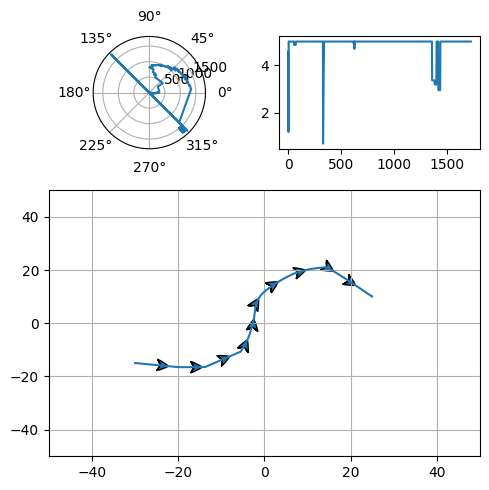

In [4]:
from matplotlib.patches import FancyArrowPatch
dset3 = f['vfh_agent/packed_odometry']

angle_idx = dset3.attrs['angle_index']
speed_idx = dset3.attrs['speed_index']
x_idx = dset3.attrs['x_index']
y_idx = dset3.attrs['y_index']

fig=plt.figure(figsize=(5,5), dpi= 100)
gs = fig.add_gridspec(3,2)

ax_angle = plt.subplot(gs[0,0], projection='polar')
print(dset3.shape)
ax_angle.plot(dset3[angle_idx,:], np.arange(0, dset3.shape[1]))

ax_speed = plt.subplot(gs[0,1])
ax_speed.plot(np.arange(0, dset3.shape[1]), dset3[speed_idx,:])

ax_xy = plt.subplot(gs[1:3,:])
ax_xy.plot(dset3[x_idx,:], dset3[y_idx,:])
ax_xy.grid()
ax_xy.set_xlim(-50, 50)
ax_xy.set_ylim(-50, 50)

# https://stackoverflow.com/a/47623457
def arrow(x,y,ax,n):
    d = len(x)//(n+1)    
    ind = np.arange(d,len(x),d)
    for i in ind:
        ar = FancyArrowPatch ((x[i-1],y[i-1]),(x[i],y[i]), 
                              arrowstyle='fancy', mutation_scale=20)
        ax.add_patch(ar)

arrow(dset3[x_idx,:], dset3[y_idx,:], ax_xy, 10)

print(len(np.argwhere(dset3[speed_idx,:] < 0)))
plt.tight_layout()
plt.show()

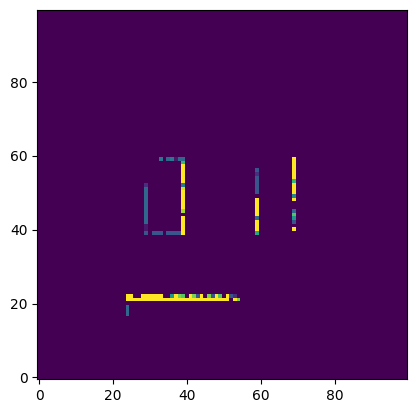

In [5]:
dset4 = np.array(f['vfh_agent/full_histogram'])
dset4 = dset4.reshape(1000,1000)

plt.imshow(dset4[450:550,450:550], interpolation='none', origin='lower')
plt.show()

In [6]:
f.close()